## Importing libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('dataset/creditcard.csv')
colors = sns.color_palette("RdPu", 10)

## Scaling amount and time features

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head().T

,0,1,2,3,4
scaled_amount,1.783274,-0.269825,4.983721,1.418291,0.670579
scaled_time,-0.994983,-0.994983,-0.994972,-0.994972,-0.994960
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533


## Random Under-Sampling

In [21]:
#shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
33599,0.193670,-0.556773,-0.707091,0.801065,1.905994,0.007904,0.321364,-0.140209,1.070601,-0.335561,...,0.098410,-0.244512,-0.378727,-0.295804,-0.061762,0.445233,0.292642,-0.254067,-0.181717,0
9252,-0.293440,-0.838461,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1
154503,-0.293440,0.200578,1.950258,0.090291,-0.140260,1.338819,-0.101992,0.052300,-0.486612,-0.041041,...,-0.206777,-0.306247,-0.469816,0.319846,-0.510228,-0.337180,-0.999429,0.033860,-0.043278,0
9487,-0.293440,-0.829650,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1
239499,0.391253,0.768877,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


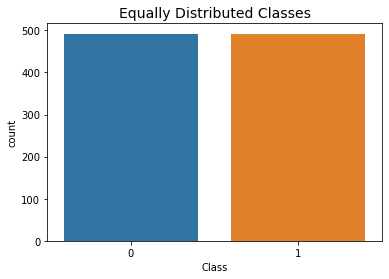

In [26]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot(data=new_df, x='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [47]:
colors = sns.color_palette("YlGnBu", 7)

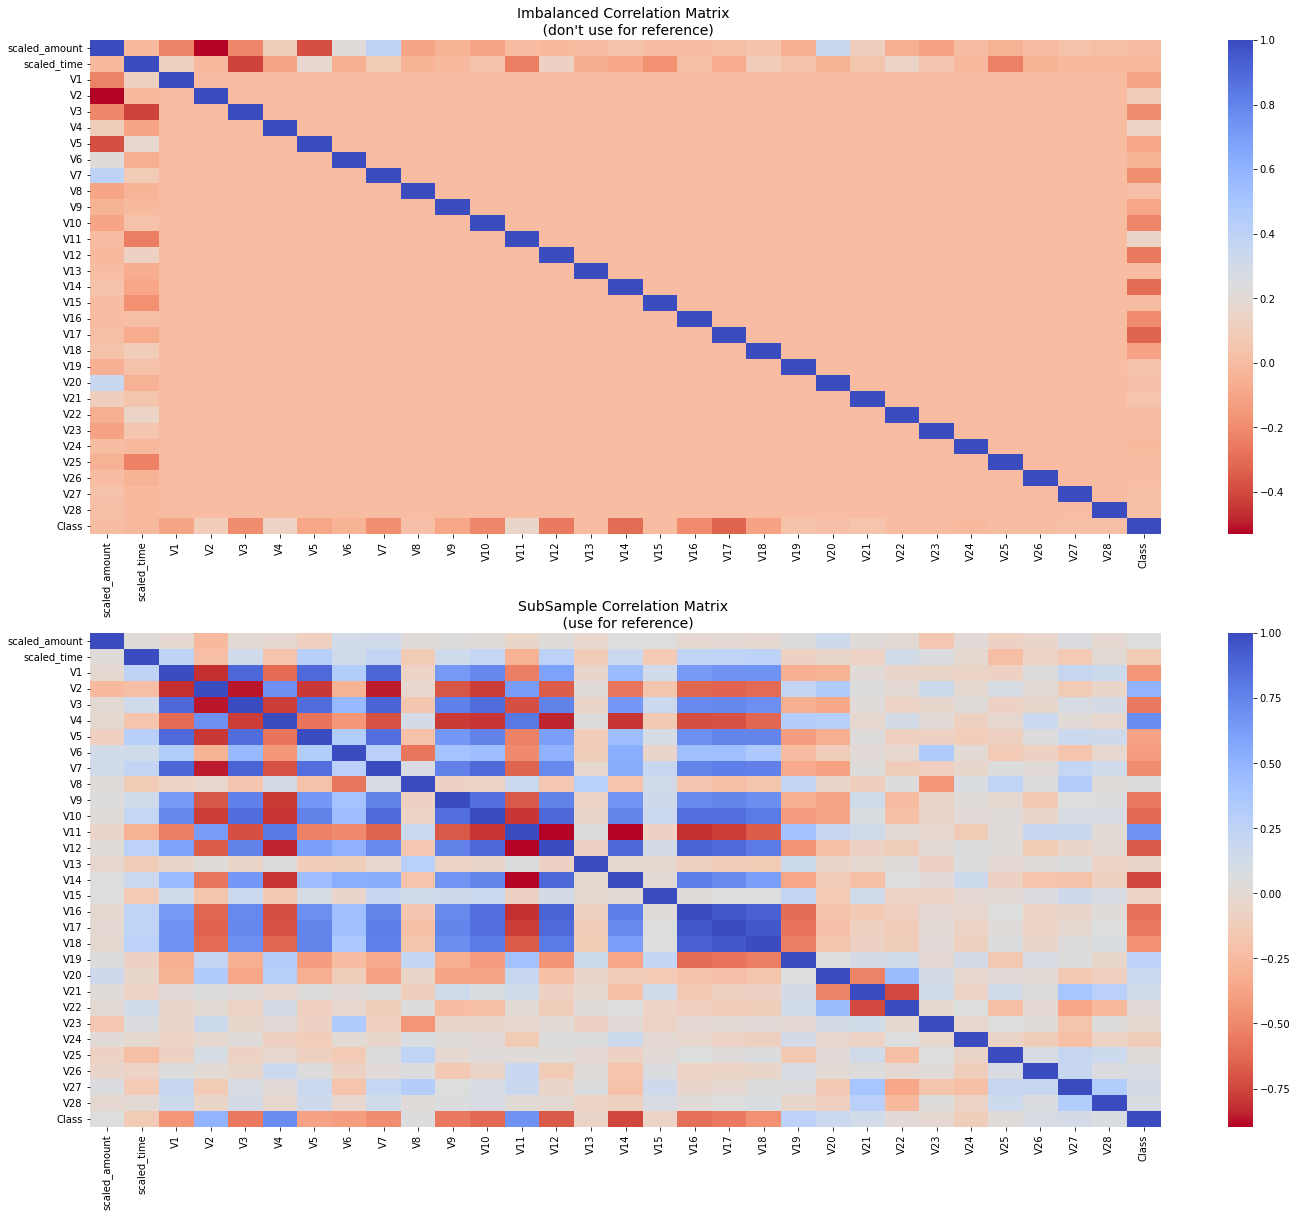

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

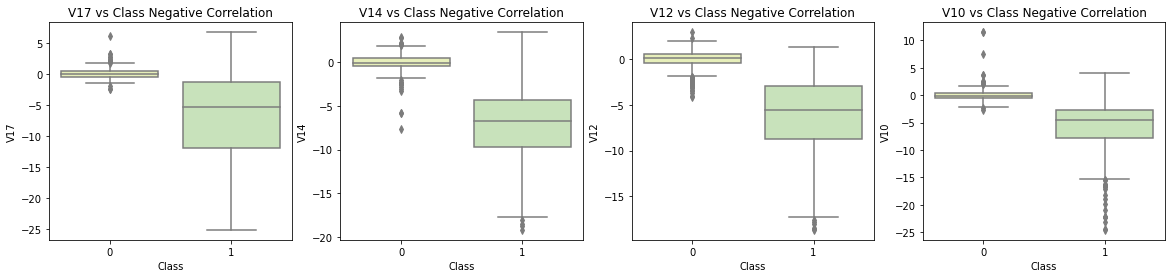

In [48]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

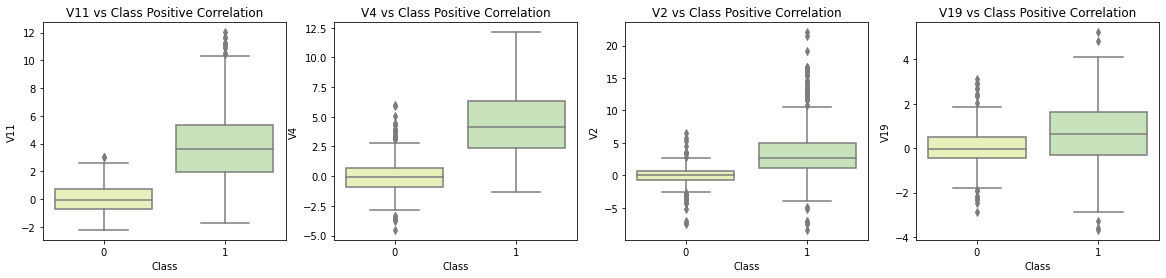

In [49]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

c:\Users\atik_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\atik_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\atik_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

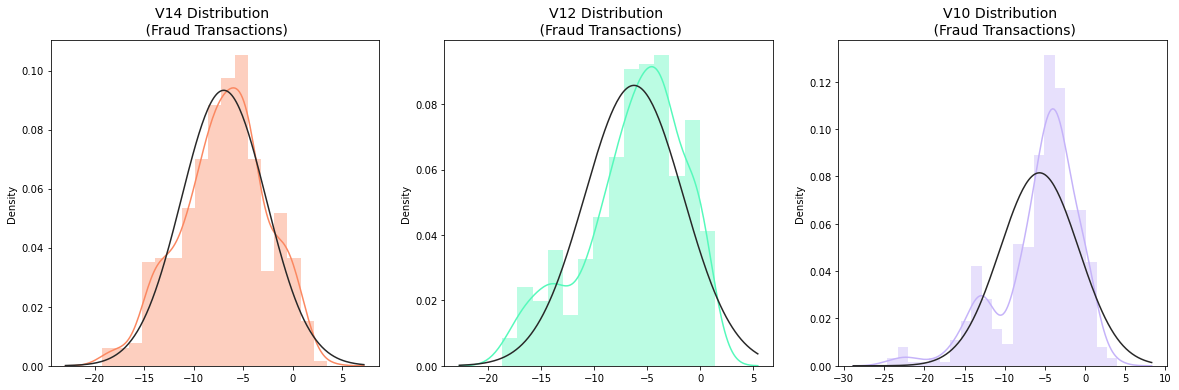

In [52]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

## Split data into training and test sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

## Resampling imbalanced data using RandomOverSampler

In [3]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train,y_train) 

0    227451
1    227451
Name: Class, dtype: int64


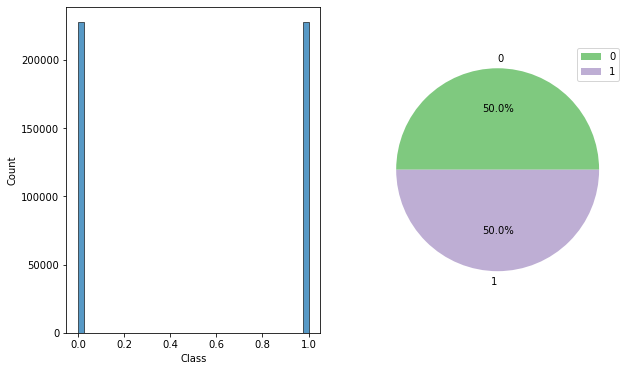

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
counts = y_train_resampled.value_counts()
sns.histplot(data=y_train_resampled,ax=axes[0])
color_palette = colors = sns.color_palette('Accent')

axes[1].pie(counts, labels = counts.index, colors=color_palette,autopct='%1.1f%%')
axes[1].legend()
print(counts)

In [5]:
y_train_resampled.describe()

count    454902.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

In [8]:
X_train_resampled.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,454902.0,-2.249621,5.312641,-56.407510,-2.741426,-0.748353,1.066155,2.454930
V2,454902.0,1.776053,3.574879,-72.715728,-0.127004,0.970005,2.871121,22.057729
V3,454902.0,-3.441116,6.044793,-48.325589,-5.222929,-1.367020,0.336036,4.187811
V4,454902.0,2.280141,3.199469,-5.683171,-0.121237,1.315466,4.342228,16.875344
V5,454902.0,-1.503458,4.119799,-113.743307,-1.730411,-0.400285,0.505193,34.801666
V6,454902.0,-0.715075,1.723653,-26.160506,-1.596296,-0.645055,0.050721,73.301626
V7,454902.0,-2.721532,5.647724,-43.557242,-3.059245,-0.666426,0.264431,120.589494
V8,454902.0,0.341922,4.526794,-73.216718,-0.202603,0.155922,0.856122,20.007208
V9,454902.0,-1.285585,2.297847,-13.320155,-2.309829,-0.709436,0.164555,10.392889
V10,454902.0,-2.817077,4.473583,-24.588262,-4.711769,-0.841997,0.031504,15.245686


C:\Users\atik_\AppData\Local\Temp/ipykernel_7632/1409552293.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(class_d[:, np.newaxis], ax=axes, annot=True,vmin=-.1, vmax=.9 ,cmap="rocket_r")


<AxesSubplot:>

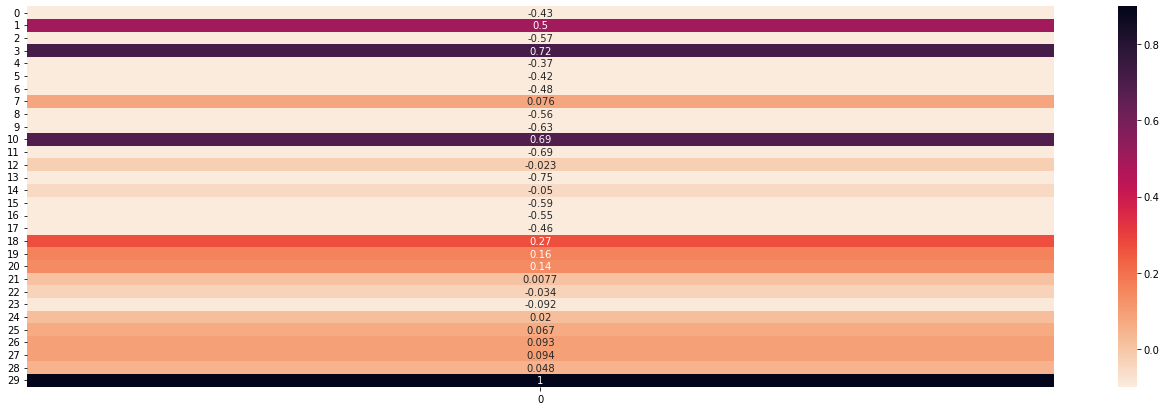

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(23, 7))
data_w = pd.concat([X_train_resampled,y_train_resampled], axis=1)
class_d = data_w.corr().iloc[-1,:]
sns.heatmap(class_d[:, np.newaxis], ax=axes, annot=True,vmin=-.1, vmax=.9 ,cmap="rocket_r")